ทำ volatility for the last X days to forecast Volatility of the next 6 month, find best X use mae metrics

In [3]:
from tvDatafeed import TvDatafeed, Interval
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [4]:
tv = TvDatafeed()

df = tv.get_hist(symbol='SET:SET50', exchange='SET', interval=Interval.in_daily, n_bars=961)
set50 = df[['close']]
set50.rename(columns = {'close':'set50'}, inplace=True)

you are using nologin method, data you access may be limited
C:\Users\Inv_edg\AppData\Local\Temp\ipykernel_18500\2202800121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set50.rename(columns = {'close':'set50'}, inplace=True)


In [5]:
name = ['SET:ADVANC', 'SET:AOT', 'SET:AWC', 'SET:BANPU', 'SET:BBL', 'SET:BDMS', 'SET:BEM', 'SET:BGRIM', 'SET:BH', 'SET:BTS', 'SET:CBG', 'SET:CENTEL', 'SET:COM7', 'SET:CPALL', 'SET:CPF', 'SET:CPN', 'SET:CRC', 'SET:DELTA', 'SET:EA', 'SET:EGCO', 'SET:GLOBAL', 'SET:GPSC', 'SET:GULF', 'SET:HMPRO', 'SET:INTUCH', 'SET:IVL', 'SET:KBANK', 'SET:KCE', 'SET:KTB', 'SET:KTC', 'SET:LH', 'SET:MINT', 'SET:MTC', 'SET:OR', 'SET:OSP', 'SET:PTT', 'SET:PTTEP', 'SET:PTTGC', 'SET:RATCH', 'SET:SAWAD', 'SET:SCB', 'SET:SCC', 'SET:SCGP', 'SET:TISCO', 'SET:TOP', 'SET:TRUE', 'SET:TTB', 'SET:TU', 'SET:WHA', 'SET:TLI']

#load all set50 data
for i in range (len(name)):
    df = tv.get_hist(symbol=name[i], exchange='SET', interval=Interval.in_daily, n_bars=961)
    df = df[['close']]
    set50 = pd.merge(set50, df, left_index=True, right_index=True, how='outer')
    set50.rename(columns = {'close':name[i]}, inplace=True)
#print(set50)

df_return = set50.pct_change() * 100

C:\Users\Inv_edg\AppData\Local\Temp\ipykernel_18500\3426211740.py:11: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_return = set50.pct_change() * 100


In [6]:
df_return = df_return[-960:]

In [7]:
df_return

,set50,SET:ADVANC,SET:AOT,SET:AWC,SET:BANPU,SET:BBL,SET:BDMS,SET:BEM,SET:BGRIM,SET:BH,...,SET:SCB,SET:SCC,SET:SCGP,SET:TISCO,SET:TOP,SET:TRUE,SET:TTB,SET:TU,SET:WHA,SET:TLI
datetime,,,,,,,,,,,,,,,,,,,,,
2020-05-08 09:00:00,0.677699,-2.025316,0.420168,0.000000,-0.900901,-0.259740,-3.015080,1.081081,2.380952,-0.884956,...,0.757576,1.204819,NaN,-0.716846,6.134969,-0.617284,0.000000,-1.562500,3.007519,NaN
2020-05-11 09:00:00,1.892085,0.000000,0.418410,-0.970874,0.909091,2.083333,2.590674,3.743316,5.813953,2.678571,...,2.255639,0.892857,NaN,-0.361011,0.000000,0.000000,2.222222,2.380952,0.000000,NaN
2020-05-12 09:00:00,0.957975,-1.550388,1.666667,1.960784,14.414414,-0.765306,1.010106,1.030928,1.098901,0.000000,...,-0.367647,0.884956,NaN,-0.362319,1.156069,0.000000,0.000000,1.550388,5.109489,NaN
2020-05-13 09:00:00,-0.600503,0.262467,-1.229508,-1.923077,3.149606,-1.285347,-0.500000,0.000000,-2.717391,-1.739130,...,0.369004,-0.584795,NaN,1.454545,-3.428571,0.000000,1.086957,-4.580153,-0.694444,NaN
2020-05-14 09:00:00,-1.297039,-0.523560,-0.829876,-3.529412,-0.763359,-0.781250,-1.005020,-3.061224,-1.117318,-0.442478,...,-1.102941,0.294118,NaN,-2.508961,-2.366864,-1.863354,0.000000,0.800000,-3.496503,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-19 09:00:00,-2.166755,-0.761421,-3.816794,-4.054054,-2.752294,-3.484321,-0.892857,-3.012048,-4.466019,0.000000,...,-1.904762,-3.200000,-1.574803,-0.501253,-1.293103,-0.636943,2.298851,-2.097902,-2.092050,-3.351955
2024-04-22 09:00:00,1.329576,1.023018,3.174603,4.694836,1.886792,2.527076,1.801802,1.242236,3.658537,0.446429,...,1.456311,1.239669,2.400000,0.251889,0.000000,-1.923077,-0.561798,0.714286,-0.427350,2.890173
2024-04-23 09:00:00,0.548539,0.506329,0.000000,-0.896861,1.851852,-2.816901,-0.884956,1.226994,0.980392,0.888889,...,0.478469,1.632653,3.906250,0.000000,0.436681,0.653595,1.694915,2.127660,2.145923,0.561798


Calculate Endogenous Variable [ Volatility of the last 120 days ]

In [8]:
df_y = df_return.copy()
df_y = df_y[['set50']]
df_y['set50'] = df_y['set50'].rolling(window=120).std()
for i in range(len(name)):
    df_y[name[i]] = df_return[name[i]].rolling(window=120).std()

In [9]:
stacked_y = df_y.stack(dropna=False).reset_index(drop=True)
stacked_y

C:\Users\Inv_edg\AppData\Local\Temp\ipykernel_18500\164477412.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_y = df_y.stack(dropna=False).reset_index(drop=True)


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
48955    2.311673
48956    1.489537
48957    1.254990
48958    1.806975
48959    2.066048
Length: 48960, dtype: float64

Loop for the best Exogenous Variable

In [10]:
window_data = list(range(3,362))
opt = pd.DataFrame({'window':window_data})
error = []

In [11]:
#do without loop first because brain ain't working
for loop in range(3,362):
    df_X = df_return.copy()
    df_X = df_X[['set50']]
    df_X['set50'] = df_X['set50'].rolling(window=loop).std()
    for i in range(len(name)):
        df_X[name[i]] = df_return[name[i]].rolling(window=loop).std()
    df_X_shifted = df_X.shift(120)
    df_X_shifted
    stacked_X_shifted = df_X_shifted.stack(dropna=False).reset_index(drop=True)
    stacked_X_shifted
    newdf = pd.concat([stacked_X_shifted,stacked_y],axis=1, keys=['X','Y'])
    newdf = newdf.dropna()
    Y = newdf['Y']
    X= newdf['X']
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    result = model.fit()
    newdf['Yhat'] = result.predict(X)
    mae = mean_absolute_error(newdf['Y'],newdf['Yhat'])
    error.append(mae)

C:\Users\Inv_edg\AppData\Local\Temp\ipykernel_18500\2469482030.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_X_shifted = df_X_shifted.stack(dropna=False).reset_index(drop=True)
C:\Users\Inv_edg\AppData\Local\Temp\ipykernel_18500\2469482030.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_X_shifted = df_X_shifted.stack(dropna=False).reset_index(drop=True)
C:\Users\Inv_edg\AppData\Local\Temp\ipykernel_18500\2469482030.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See t

In [12]:
opt['MAE'] = np.array(error)
opt

,window,MAE
0,3,0.469362
1,4,0.456441
2,5,0.445934
3,6,0.437431
4,7,0.430085
...,...,...
354,357,0.322565
355,358,0.322575
356,359,0.322590
357,360,0.322617


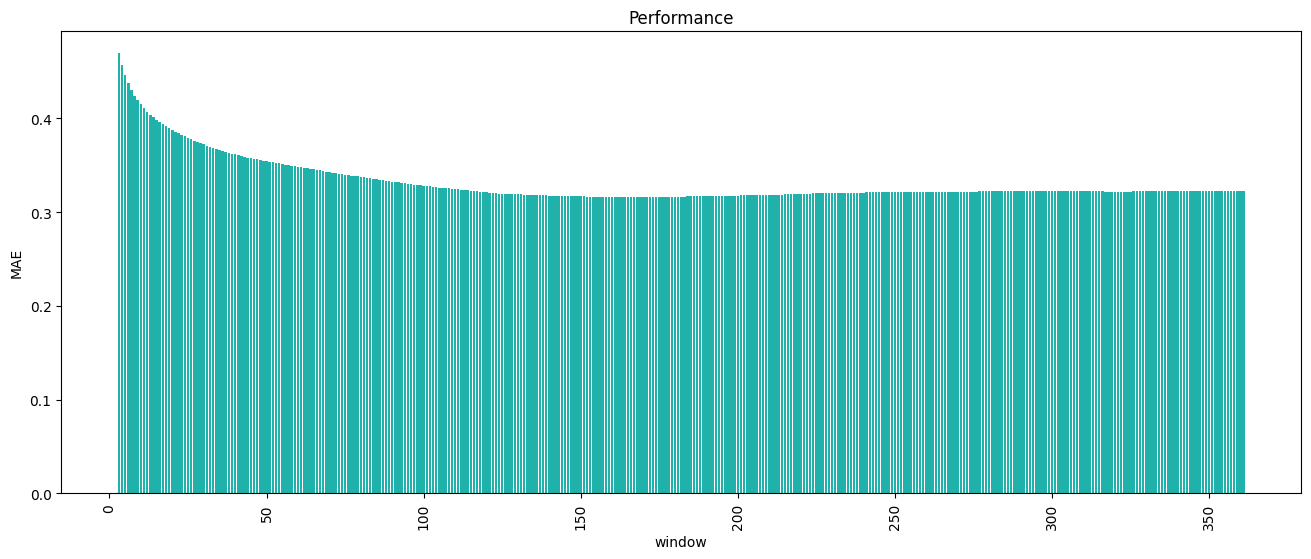

In [13]:
plt.figure(figsize=(16,6))
plt.bar(opt['window'],opt['MAE'],color = 'lightseagreen')
plt.xlabel('window')
plt.ylabel('MAE')
plt.title('Performance')
plt.xticks(rotation=90)
plt.show()

In [16]:
min_row_index = opt['MAE'].idxmin()
min_row = opt.loc[min_row_index]
min_row['window']

169.0

Forecast Volatility using OLS with independent variable: Volatility of the last 169 days